<a href="https://colab.research.google.com/github/SowmyaDontha88/Python/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Problem Statement--> Predicting eligibility for loan based on the given features**

In [2]:
train = pd.read_csv("/content/train_ctrUa4K.csv")
test = pd.read_csv("/content/test_lAUu6dG.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_new = train.copy()
test_new = test.copy()

In [6]:
train.shape , test.shape

((614, 13), (367, 12))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# **Target Variable---> Loan_Status**

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

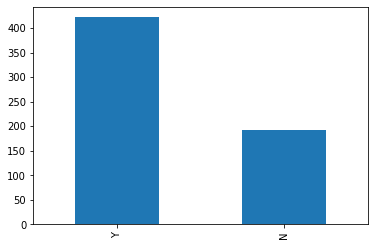

In [12]:
train['Loan_Status'].value_counts().plot.bar()

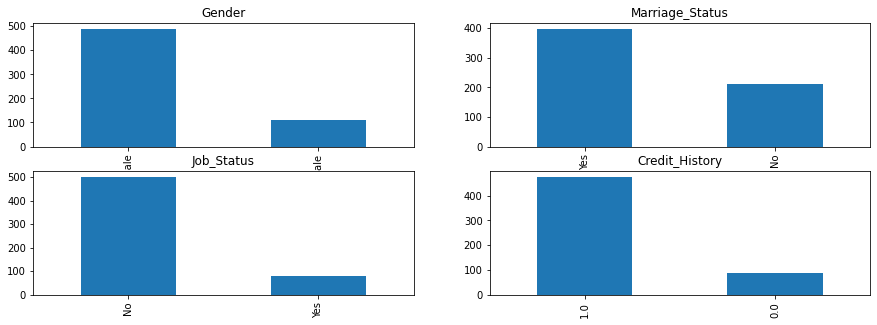

In [13]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts().plot.bar(figsize=(15,5),title='Gender')
plt.subplot(222)
train['Married'].value_counts().plot.bar(figsize=(15,5),title='Marriage_Status')
plt.subplot(223)
train['Self_Employed'].value_counts().plot.bar(figsize=(15,5),title= 'Job_Status')
plt.subplot(224)
train['Credit_History'].value_counts().plot.bar(figsize=(15,5),title='Credit_History')
plt.show( )

# Analysis from above graph

1.   Most of the applicants are male
2.   Around 70% applicants are married
3.   Only few percentage are self-emoployed
4.   Almost 80% have repaid their debts



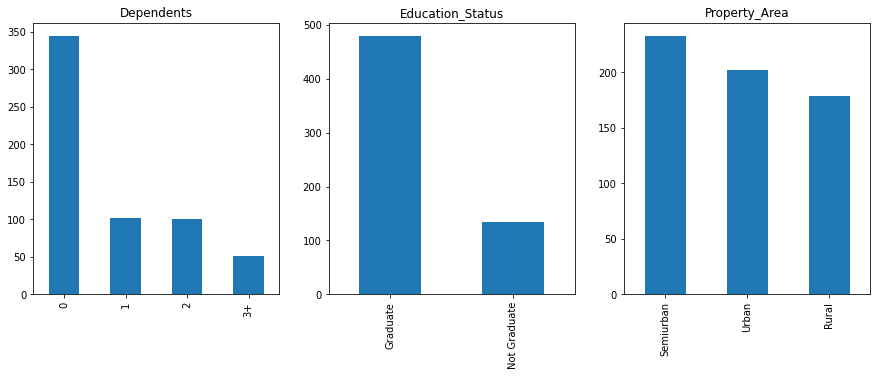

In [14]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts().plot.bar(figsize=(15,5),title='Dependents')
plt.subplot(132)
train['Education'].value_counts().plot.bar(figsize=(15,5),title='Education_Status')
plt.subplot(133)
train['Property_Area'].value_counts().plot.bar(figsize=(15,5),title= 'Property_Area')
plt.show( )

# Analysis from above graph

1.   Most of the applicants don't have dependents
2.   Around 85% applicants are Graduates
3.   Applicants are mainly from Semiurban,Urban and Rural respectively

# Independent variable(Numerical)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

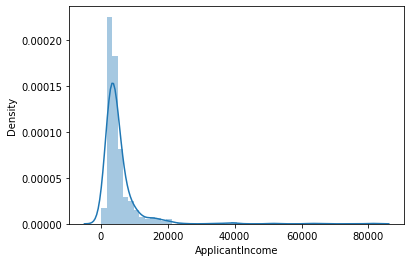

In [15]:
sns.distplot(train['ApplicantIncome'])

Text(0.5, 0.98, '')

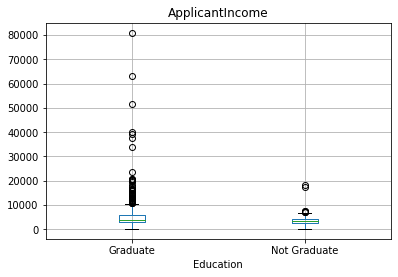

In [16]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

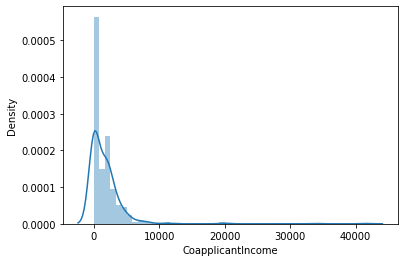

In [17]:
sns.distplot(train['CoapplicantIncome'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

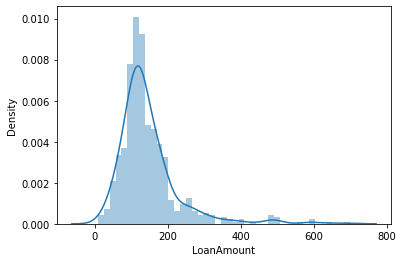

In [18]:
sns.distplot(train['LoanAmount'])

# **Bi-Variant Analysis**

<AxesSubplot:xlabel='Gender'>

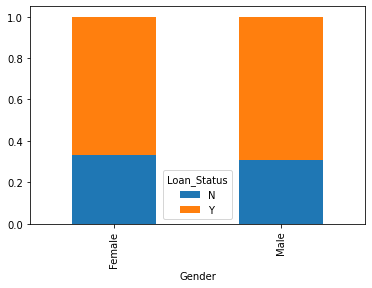

In [19]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

Loan approvals for both genders are almost equal

<AxesSubplot:xlabel='Married'>

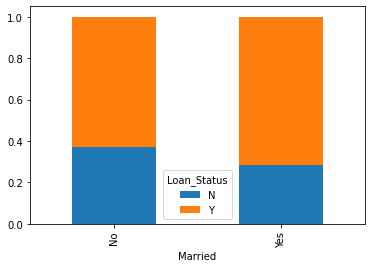

In [20]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

Applicants who are married will have a high probability of getting a loan

<AxesSubplot:xlabel='Dependents'>

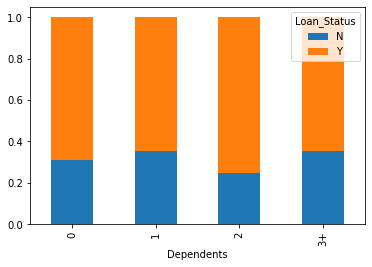

In [21]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

Dependents with 1 0r 3 have the same probability of acceptance

<AxesSubplot:xlabel='Education'>

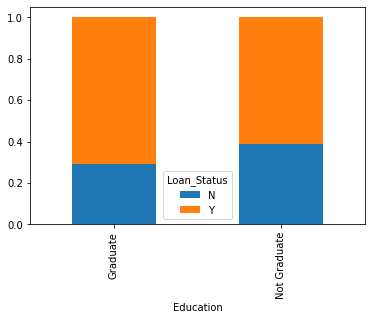

In [22]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Self_Employed'>

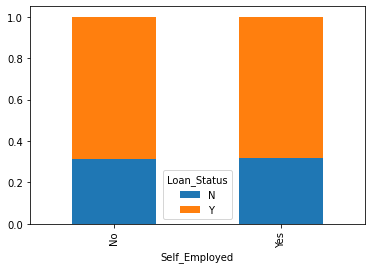

In [23]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

There is no significance difference with applicants on self-employement

<AxesSubplot:xlabel='Credit_History'>

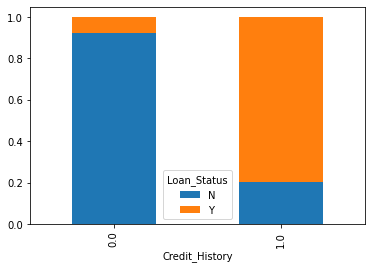

In [24]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

People who already had loan history and the one who repaid the loan had more chances of getting loan

<AxesSubplot:xlabel='Loan_Status'>

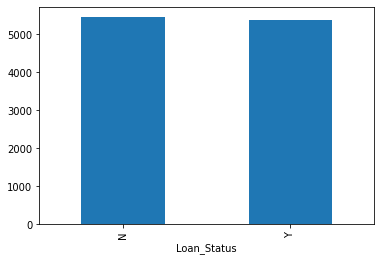

In [25]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [28]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)


In [29]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [30]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [31]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [34]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [35]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [36]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# **Outliers**

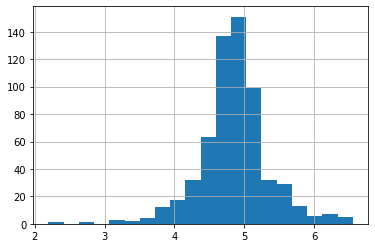

In [37]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log']=np.log(test['LoanAmount'])

# **Logistic Regression**

Lets drop Loan_ID column as it doesn't make significance difference

In [38]:
train=train.drop('Loan_ID',axis=1)
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [39]:
test=test.drop('Loan_ID',axis=1)
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log'],
      dtype='object')

In [40]:
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)

<ipython-input-40-99ca5e5a2bfb>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)


Setting target and dependent variables

In [41]:
X= train.drop('Loan_Status',1)
X

<ipython-input-41-ac05139f2c12>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= train.drop('Loan_Status',1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [42]:
Y= train.Loan_Status

In [43]:
Y = Y.ravel() 

In [44]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [45]:
X.shape

(614, 21)

In [46]:
Y.shape

(614,)

# **Spliting the data**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size=0.3)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True ,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [51]:
predict_cv=model.predict(x_cv)

In [52]:
accuracy_score(y_cv,predict_cv)

0.8108108108108109

# The predictions are 80% accurate.

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [55]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)

In [56]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [57]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8042081949058693


GridsearchCV gives the best parameters for the model that provides high accuracy rate

Lets make a cross vcalidation logistic model for Stratifield 5 fold and make predictions on test dataset

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
from sklearn import metrics

In [60]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,Y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = Y[train_index],Y[test_index]
    
    #model
    lr = LogisticRegression(random_state=1)
    lr.fit(xtr,ytr)
    predict_test = model.predict(xvl)
    score = accuracy_score(yvl,predict_test)
    print('Accuracy :',score)
    i+=1
    predict_test = model.predict(test)    
    pred_test = lr.predict_proba(xvl)[:,1]

1 of KFold 5
Accuracy : 0.8211382113821138
2 of KFold 5
Accuracy : 0.8211382113821138
3 of KFold 5
Accuracy : 0.7967479674796748
4 of KFold 5
Accuracy : 0.7967479674796748
5 of KFold 5
Accuracy : 0.8360655737704918


# **Decision Tree**

In [74]:
from sklearn import tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
i =1
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
for train_index,test_index in kf.split(X,Y):
  print('{} of KFold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = Y[train_index],Y[test_index]
  model = tree.DecisionTreeClassifier(random_state=1)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('Accuracy :',score)
  i+=1
  pred_test = model.predict(test)

1 of KFold 5
Accuracy : 0.6991869918699187
2 of KFold 5
Accuracy : 0.6991869918699187
3 of KFold 5
Accuracy : 0.7073170731707317
4 of KFold 5
Accuracy : 0.6504065040650406
5 of KFold 5
Accuracy : 0.6885245901639344


The accuracy we got from Decision tree is almost 70% which less when compared to that of Logistic Regression

In [72]:
param_grid1 = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [80]:
tree_clas = DecisionTreeClassifier(random_state=42)
grid_search1 = GridSearchCV(estimator=tree_clas, param_grid=param_grid1, cv=5, verbose=True)
grid_search1.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [81]:
print("Tuned Hyperparameters :", grid_search1.best_params_)
print("Accuracy :",grid_search1.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}
Accuracy : 0.7622435020519835


By using GridsearchCV, the accuracy we got is 76%

# **Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
i =1
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
for train_index,test_index in kf.split(X,Y):
  print('{} of KFold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = Y[train_index],Y[test_index]
  model_R = RandomForestClassifier(random_state=1,max_depth = 5)
  model_R.fit(xtr,ytr)
  pred_test = model_R.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('Accuracy :',score)
  i+=1
  pred_test = model_R.predict(test)

1 of KFold 5
Accuracy : 0.8211382113821138
2 of KFold 5
Accuracy : 0.8211382113821138
3 of KFold 5
Accuracy : 0.8048780487804879
4 of KFold 5
Accuracy : 0.7804878048780488
5 of KFold 5
Accuracy : 0.8278688524590164


In [65]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [66]:
CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [67]:
print("Tuned Hyperparameters :", CV_rfc.best_params_)
print("Accuracy :",CV_rfc.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}
Accuracy : 0.8135978112175103


For the above parameters of Random forest classifier we get a best accuracy score

# **XGBoost**

In [68]:
from xgboost import XGBClassifier

In [69]:
i =1
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
for train_index,test_index in kf.split(X,Y):
  print('{} of KFold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = Y[train_index],Y[test_index]
  model_XG = XGBClassifier(n_estimators= 50,max_depth = 5)
  model_XG.fit(xtr,ytr)
  pred_test = model_XG.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('Accuracy :',score)
  i+=1
  pred_test = model_XG.predict(test)

1 of KFold 5
Accuracy : 0.7723577235772358
2 of KFold 5
Accuracy : 0.7886178861788617
3 of KFold 5
Accuracy : 0.7560975609756098
4 of KFold 5
Accuracy : 0.7154471544715447
5 of KFold 5
Accuracy : 0.7540983606557377


In [70]:
param_grid={'gamma':[50,10,5,0.5],'max_depth':[3,4,5]}
gsv=GridSearchCV(model_XG,param_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [50, 10, 5, 0.5], 'max_depth': [3, 4, 5]})

In [71]:
print("Tuned Hyperparameters :", gsv.best_params_)
print("Accuracy :",gsv.best_score_)

Tuned Hyperparameters : {'gamma': 10, 'max_depth': 3}
Accuracy : 0.8112448700410397


For the above parameters we get the highest accuracy of 81%

In [94]:
accuracy=['DecisionTree','LinearRegression','RandomForest','XGBOOST']
p = [grid_search1.best_score_,accuracy_score(y_cv,predict_cv),CV_rfc.best_score_,gsv.best_score_]

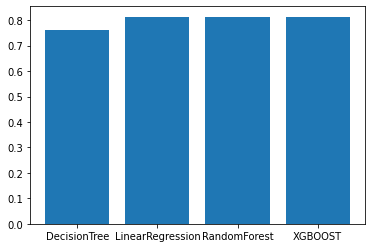

In [95]:
plt.bar(x=accuracy, height=p)
plt.show()

**CONCLUSION:**From the above graph we can clearly see that Linear regression, RandomForest and XGBOOST have almost same accuracy of 81% and DecisionTree being lowest about 75%